![AML Final Lab Test](https://pbs.twimg.com/media/FVT29OCWQAMAxp5?format=jpg&name=medium)

<img style="width:70px; height:70px; float:left;" src="https://thumbs.gfycat.com/DisgustingSpiffyIguana-size_restricted.gif"><img style="width:70px; height:70px; float:right;" src="https://thumbs.gfycat.com/DisgustingSpiffyIguana-size_restricted.gif"><h2 style="background-color:black; color:white; text-align:center;"><b><i>Import Libraries </i></b></h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

<img style="width:70px; height:70px; float:left;" src="https://thumbs.gfycat.com/ResponsibleUnfinishedAlpinegoat-size_restricted.gif"><img style="width:70px; height:70px; float:right;" src="https://thumbs.gfycat.com/ResponsibleUnfinishedAlpinegoat-size_restricted.gif"><h2 style="background-color:black; color:white; text-align:center;"><b><i> Task 1 </i></b><h2>

###  1.1. Create a Artificial Training data .....

In [2]:
v = [[1, 0.5], [0.5, 1]]

def artificial_data_1(n, a):
    x = None
    if n == 1:
        x = np.random.multivariate_normal([a, a], v, 1).T
    if n == 0:
        x = np.random.multivariate_normal([0, 0], v, 1).T

    return x

In [3]:
y = np.random.binomial(1, 0.3, 1000)
y

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [4]:
x = [artificial_data_1(i, a=1) for i in y]
x = np.array(x).reshape(-1, 2)
x

array([[-1.39727119, -2.07483005],
       [ 0.8856497 ,  0.88779415],
       [ 0.94591158,  0.91964387],
       ...,
       [-0.95361418, -1.24170265],
       [ 0.60301181,  0.29031836],
       [ 0.40809428,  0.2068955 ]])

![Section end](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### 1.2. Compute the posterior probabilities for observations ......

In [5]:
from sklearn.naive_bayes import GaussianNB

In [6]:
NB = GaussianNB()
NB.fit(x, y)

GaussianNB()

In [7]:
y_pred = NB.predict_proba(x)
y_pred 

array([[0.99505685, 0.00494315],
       [0.54572229, 0.45427771],
       [0.52298306, 0.47701694],
       ...,
       [0.98326524, 0.01673476],
       [0.74157126, 0.25842874],
       [0.79062229, 0.20937771]])

![Section end](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### 1.3.  Repeat the above steps for a = 0.5, 1, 2, 3 and for each a create ROC curve.....

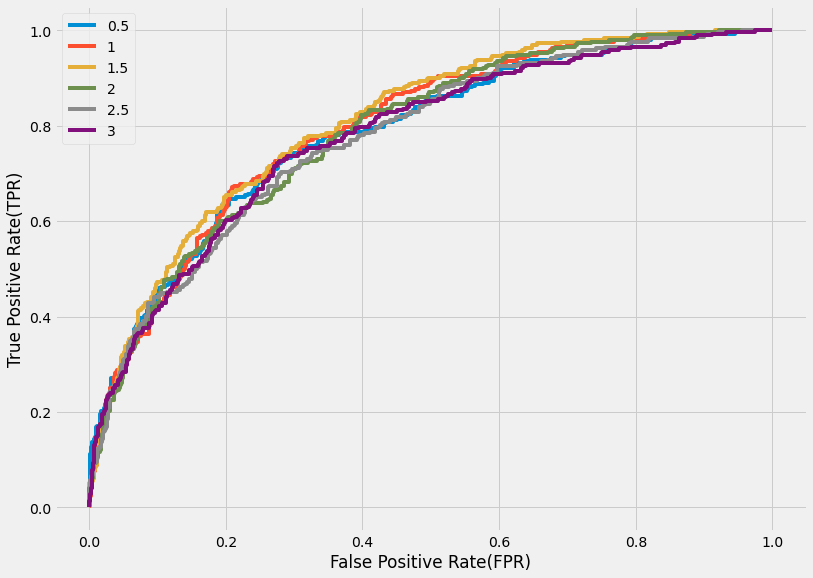

In [8]:
ex = [0.5, 1, 1.5, 2, 2.5, 3]

for a in ex:
    plt.rcParams["figure.figsize"] = (12, 9)
    x = [artificial_data_1(i, a=1) for i in y]
    x = np.array(x).reshape(-1, 2)
    y_pred = NB.predict_proba(x)[::,1]
    
    from sklearn import metrics
    FPR, TPR, _ = metrics.roc_curve(y,  y_pred)

    plt.plot(FPR,TPR, label=str(a))
    
    plt.xlabel('False Positive Rate(FPR)')
    plt.ylabel('True Positive Rate(TPR)')
    plt.legend()

<img style="width:70px; height:70px; float:left;" src="https://thumbs.gfycat.com/ResponsibleUnfinishedAlpinegoat-size_restricted.gif"><img style="width:70px; height:70px; float:right;" src="https://thumbs.gfycat.com/ResponsibleUnfinishedAlpinegoat-size_restricted.gif"><h2 style="background-color:black; color:white; text-align:center;"><b><i> Task 2 </i></b><h2>

### 2.1. Create an artificial dataset with 1000 samples as follows ......

In [9]:
x = [np.random.uniform(low=0.0, high=np.pi, size=10) for i in range(1000)]
x = np.array(x).reshape(-1, 10)
x

array([[0.98811363, 2.21866696, 1.28482982, ..., 0.34004874, 1.98077059,
        2.42460298],
       [2.97864693, 1.67014775, 0.03327353, ..., 1.50331365, 1.52472285,
        1.54017646],
       [0.57755899, 3.13769539, 0.28419808, ..., 0.8416388 , 1.28008445,
        1.23863035],
       ...,
       [2.75943149, 1.81372766, 0.38845257, ..., 1.67151725, 2.48118112,
        0.86108411],
       [2.62928999, 0.45352012, 2.44818563, ..., 3.11895407, 1.17378497,
        2.32707802],
       [2.4030433 , 0.08642426, 0.88009184, ..., 2.5206345 , 1.71546915,
        0.76422923]])

In [10]:
y = np.where(np.sum(np.sin(x[:, 0:4]), axis=1) > 2.5, 1, 0)
y

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,

![Section end](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### 2.2. Visualize (X1, X2, X3, X4) with PCA using first two principal components .......

In [11]:
# import
from sklearn.decomposition import PCA

In [12]:
# fit
pca_ = PCA(n_components=2).fit(x[:, 0:4])
pca = PCA(n_components=2).fit_transform(x[:, 0:4])

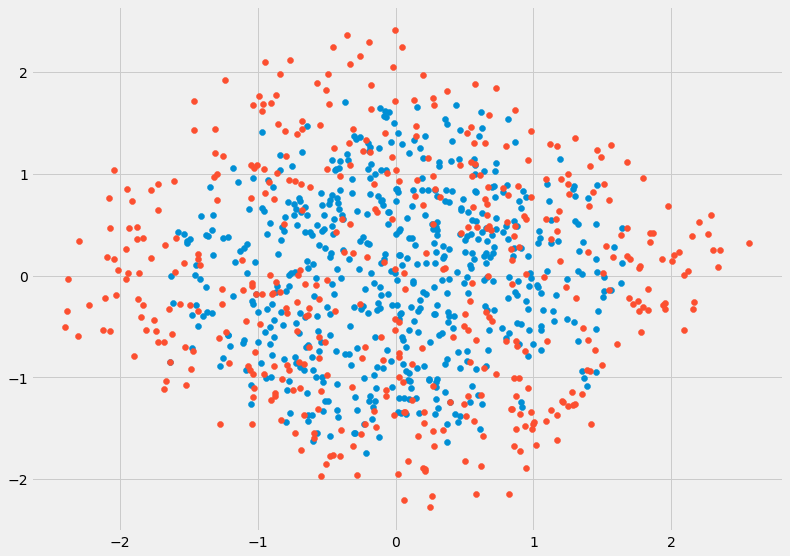

In [13]:
# Visualize
plt.figure(figsize = (12, 9))
plt.scatter(pca[y == 1][:, 0], pca[y == 1][:, 1])
plt.scatter(pca[y == 0][:, 0], pca[y == 0][:, 1])

![Section end](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### 2.3. Compare using 10-fold crossvalidation following models

In [14]:
from sklearn.model_selection import cross_val_score

#### 2.3.1 Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rf = RandomForestClassifier()
rf_scores = cross_val_score(rf, x, y, cv=10)    # 10 fold cross validation

In [17]:
print(rf_scores)

[0.82 0.91 0.88 0.87 0.9  0.83 0.82 0.86 0.85 0.85]


In [18]:
# AVG
np.mean(rf_scores)

0.859

In [19]:
# STD
np.std(rf_scores)

0.02981610303175117

#### 2.3.2 Logistic Ridge Regression

In [20]:
from sklearn.linear_model import RidgeClassifier

In [21]:
lrr = RidgeClassifier()
lrr_scores = cross_val_score(lrr, x, y, cv=10)    # 10 fold cross validation

In [22]:
print(lrr_scores)

[0.49 0.54 0.54 0.51 0.62 0.55 0.52 0.53 0.54 0.55]


In [23]:
# AVG
np.mean(lrr_scores)

0.5389999999999999

In [24]:
# STD
np.std(lrr_scores)

0.032388269481403296

#### 2.3.3 AdaBoost

In [25]:
from sklearn.ensemble import AdaBoostClassifier

In [26]:
ad = AdaBoostClassifier()
ad_scores = cross_val_score(ad, x, y, cv=10)    # 10 fold cross validation
print(ad_scores)

[0.9  0.97 0.93 0.92 0.95 0.93 0.89 0.95 0.94 0.96]


In [27]:
# AVG
np.mean(ad_scores)

0.9339999999999999

In [28]:
# STD
np.std(ad_scores)

0.02416609194718912

#### 2.3.4 Visualize Model Result

In [29]:
label = ['Random Forrest',' Logistic Ridge Regression','AdaBoost']
mean = [np.mean(rf_scores),np.mean(lrr_scores), np.mean(ad_scores)]
std = [np.std(rf_scores), np.std(lrr_scores), np.std(ad_scores)]

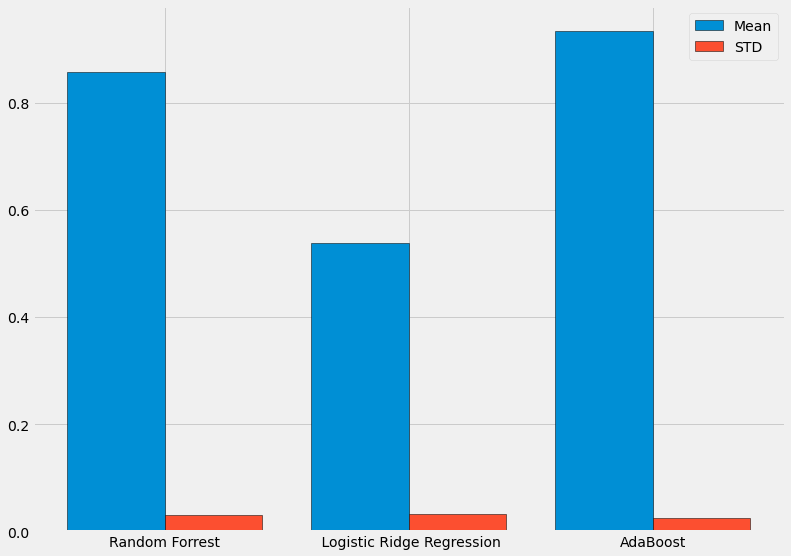

In [30]:
xpos = np.arange(len(label))

plt.figure(figsize = (12, 9))
plt.bar(xpos-0.2, mean, width= 0.4, edgecolor='black', label="Mean")
plt.bar(xpos+0.2, std, width=0.4, edgecolor='black', label="STD")
plt.xticks(xpos,label)
plt.legend()

![Section end](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### 2.4. Rank features with respect to their importance using Random Forest

In [31]:
rf = RandomForestClassifier() 
rf.fit(x, y)

RandomForestClassifier()

In [32]:
rf.feature_importances_

array([0.13785602, 0.1745356 , 0.19769916, 0.20487104, 0.04664757,
       0.04273293, 0.04936886, 0.0517618 , 0.04585942, 0.0486676 ])

In [33]:
srf = np.sort(rf.feature_importances_)[::-1]
srf

array([0.20487104, 0.19769916, 0.1745356 , 0.13785602, 0.0517618 ,
       0.04936886, 0.0486676 , 0.04664757, 0.04585942, 0.04273293])

Text(0.5, 1.0, 'Rank features with respect to their importance using Random Forrest')

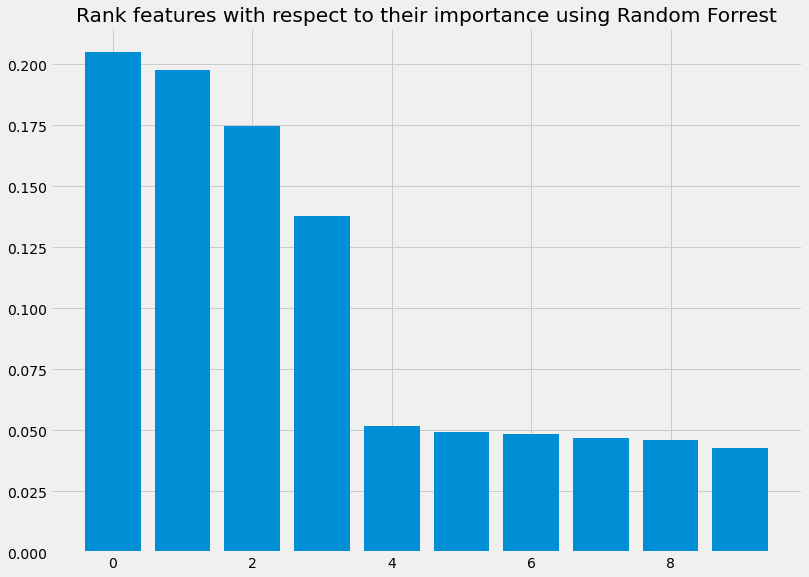

In [34]:
plt.bar([i for i in range(10)], srf)
plt.title("Rank features with respect to their importance using Random Forrest")

<img style="width:70px; height:70px; float:left;" src="https://cliply.co/wp-content/uploads/2019/05/371905140_MEET_ROBOT_400px.gif"><img style="width:70px; height:70px; float:right;" src="https://cliply.co/wp-content/uploads/2019/05/371905140_MEET_ROBOT_400px.gif"><h2 style="background-color:black; color:white; text-align:center;"><b><i> END </i></b></h2>